# Understanding unsupervised learning
*   라벨링이 되지 않은 데이터를 다루는 머신러닝 학습 기법
<br>
<br>

# Applications of unsupervised learning
*   Clustering (군집화)
*   Association mining (연관 마이닝)
*   Anomaly detection (이상탐지)
*   Dimensionality reduction (차원축소)
<br>
<br>

# Clustering using MiniBatch K-means clustering
*   사이킷런(sklearn) MiniBatchKmeans 클래스를 이용한 군집화
*   군집화를 위한 기초 데이터 불러오기

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import seaborn as sns

sns.set()
plt.rcParams['figure.figsize'] = (14, 7)

# Excel 불러오기
df = pd.read_excel("https://github.com/sureshHARDIYA/phd-resources/blob/master/Data/Review%20Paper/raw%20files/preprocessed.xlsx?raw=true")

# 데이터프레임에 상위 10개의 record 조회
df.head(10)

,Unnamed: 0,Abstract,Author,Doi,Journal,Title,Year
0,786,NaN,Rachel D. Williams,NaN,American Society for Information Science,“we’re not allowed”: public librarians’ perspe...,2016
1,885,NaN,Ghassan F. Bati,NaN,Association for Computing Machinery,“trust us”: mobile phone use patterns can pred...,2018
2,1083,NaN,Alex Leavitt,NaN,Association for Computing Machinery,“this is a throwaway account”: temporary techn...,2015
3,1004,NaN,Yngve Dahl,NaN,Association for Computing Machinery,“there are no secrets here!”: professional sta...,2012
4,899,NaN,Max Van Kleek,NaN,Association for Computing Machinery,“the crowd keeps me in shape”: social psycholo...,2013
5,1282,NaN,Tawfiq Ammari,NaN,Association for Computing Machinery,“thanks for your interest in our facebook grou...,2016
6,434,NaN,Kathleen O’Leary,NaN,Association for Computing Machinery,"“suddenly, we got to become therapists for eac...",2018
7,1168,NaN,Cara Wilson,NaN,Association for Computing Machinery,“put yourself in the picture”: designing for f...,2016
8,1238,NaN,Sarah Martindale,NaN,Association for Computing Machinery,“proof in the pudding”: designing iot plants t...,2017
9,1272,NaN,Margaret C. Jack,NaN,Association for Computing Machinery,"“privacy is not a concept, but a way of dealin...",2019


*   키워드 추출

Fitting () clusters
Fitting () clusters
Fitting () clusters
Fitting () clusters
Fitting () clusters
Fitting () clusters
Fitting () clusters
Fitting () clusters
Fitting () clusters
Fitting () clusters


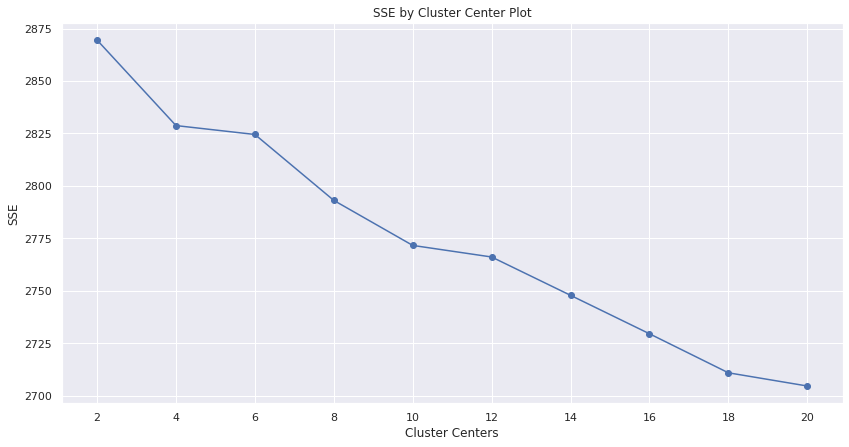

In [7]:
# 필수 라이브러리 import
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import MiniBatchKMeans
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

# 문서의 유사도나 중요도 같은 것을 계산하기 위해서 문서내의 단어들을 계량화(quantization)를 하는데 그 계량화를 할 때 중요한 단어와 중요하지 않은 단어를 다르게 가중치 고려하고 싶을 때 사용하는 가장 잘 알려진 방법
# TFIDF = TF(단어빈도) * IDF(역문서 빈도)
tfidf = TfidfVectorizer (
    # 빈도가 5회 미만 경우 제외
    # 비중이 0.95 초과인 경우 제외
    # 단어집을 만들 때 오직 말뭉치 전반에 걸친 용어빈도(TF)에 의한 TOP MAX_FEATURES만 고려
    # 영어용 Stop word 사용
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
# 단어별 IDF 값을 구해 저장
tfidf.fit(df.Title)
# 벡터화
text = tfidf.transform(df.Title)

# 군집화 함수 정의
def generate_optimal_clusters(data, max_k):
  iters = range(2, max_k+1, 2)
  sse = []

  for k in iters:
    # 알고리즘이 반복될 때 전체 데이터에서 일부를 무작위로 선택해(미니 배치) 클러스터의 중심을 계산
    sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
    print('Fitting () clusters'.format(k))
  
  f, ax = plt.subplots(1, 1)

  ax.plot(iters, sse, marker='o')
  ax.set_xlabel('Cluster Centers')
  ax.set_xticks(iters)
  ax.set_ylabel('SSE')
  ax.set_title('SSE by Cluster Center Plot')

# K 개의 갯수가 20인, K-means 군집화 수행
generate_optimal_clusters(text, 20)

# Plotting clusters

Text(0.5, 1.0, 'Generated TSNE Cluster Plot')

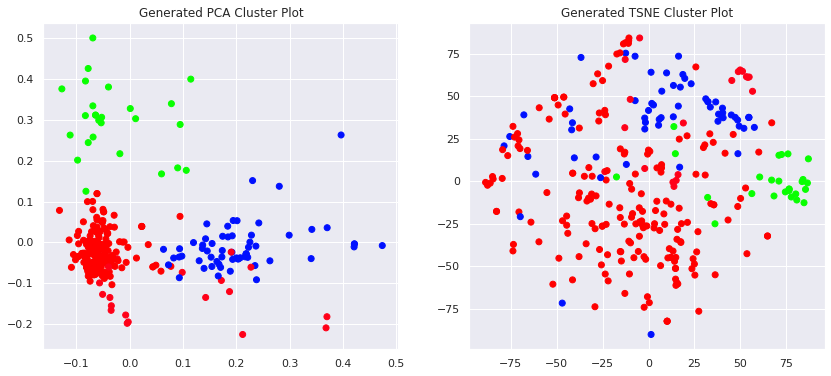

In [ ]:
# K-means 모델 생성
clusters = MiniBatchKMeans(n_clusters=4, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)

# 차원축소 위한 PCA 기술과 TSNE 기술을 사용하여, Plot 그래프를 그림
# PCA (주성분분석)
# TSNE (T-분산추정이웃임베딩)
max_label = max(clusters)
max_items = np.random.choice(range(text.shape[0]), size=3000, replace=True)
pca = PCA (n_components=2).fit_transform(text[max_items,:].todense())
tsne = TSNE().fit_transform(PCA(n_components=50).fit_transform(text[max_items,:].todense()))

idx = np.random.choice(range(pca.shape[0]), size=300, replace=True)
label_subset = clusters[max_items]
label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]

f, ax = plt.subplots(1, 2, figsize=(14, 6))
ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
ax[0].set_title('Generated PCA Cluster Plot')

ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
ax[1].set_title('Generated TSNE Cluster Plot')

# Word cloud

Cluster 0 

bipolar,patient,framework,evaluation,risk,older,internet,healthcare,activity,approach,online,anxiety,research,digital,children,assessment,clinical,dementia,adaptive,cognitive,intervention,disorders,technology,learning,psychiatric,community,interventions,management,therapy,review,adults,use,support,designing,schizophrenia,stress,data,people,analysis,care,self,mobile,disorder,using,patients,design,study,treatment,based,depression
Cluster 1 

cessation,brief,comparing,single,disorder,people,adults,symptoms,risk,clinical,women,prevention,reduce,improve,training,use,results,online,personalized,internet,cluster,alcohol,anxiety,feedback,efficacy,patients,health,mental,therapy,primary,help,self,program,care,effects,cognitive,pilot,treatment,depression,tailored,effectiveness,web,based,randomised,study,intervention,protocol,randomized,controlled,trial
Cluster 2 

qualitative,physical,digital,implementation,self,medical,management,patient,adults,designing,life,quality,work,development

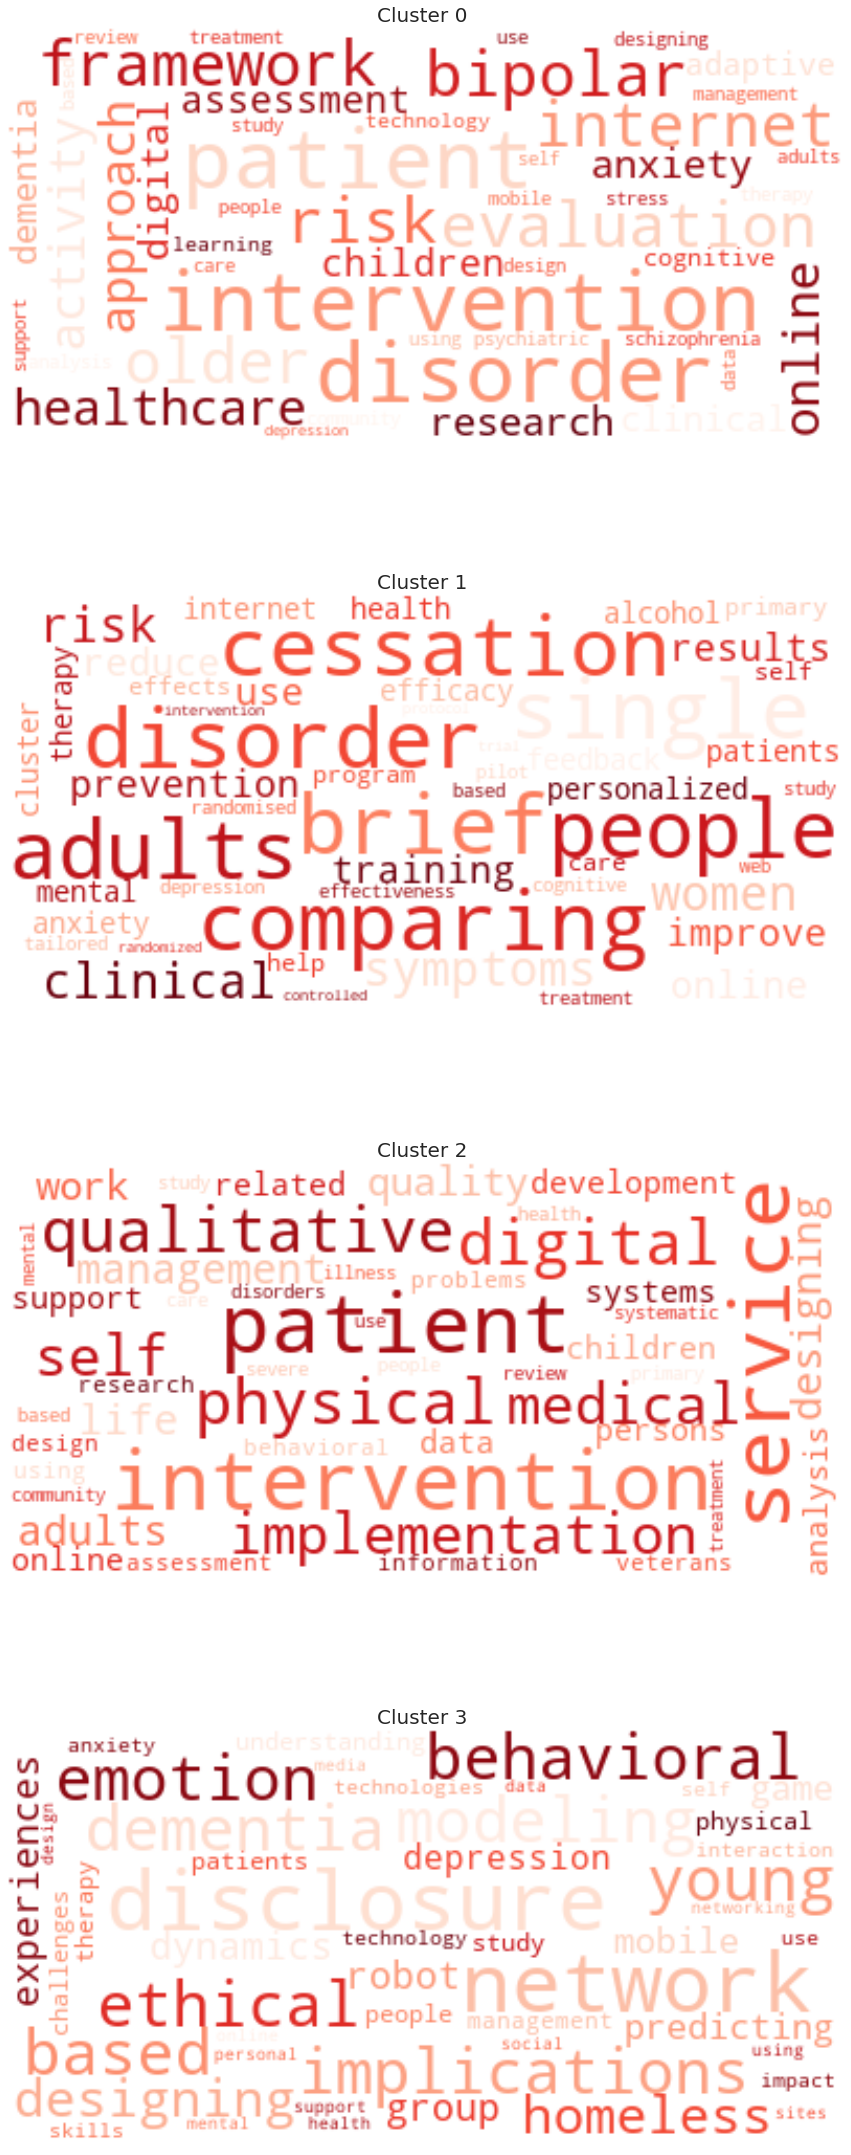

In [ ]:
# wordcloud = 핵심 단어를 시각적으로 돋보이게 하는 기법
from wordcloud import WordCloud

fig, ax = plt.subplots(4, sharex=True, figsize=(15, 10*4))
plt.rcParams["axes.grid"] = False

def high_frequency_keywords(data, clusters, labels, n_terms) :
    df = pd.DataFrame(data.todense()).groupby(clusters).mean()

    for i, r in df.iterrows():
      # np.argsort 행/열 정렬 (axis=0(행) / axis=1(열))
      words = ','.join([labels[t] for t in np.argsort(r)[-n_terms:]])
      print('Cluster {} \n'.format(i))
      print(words)
      wordcloud = WordCloud(max_font_size=40, collocations=False, colormap='Reds', background_color='White').generate(words)
      ax[i].imshow(wordcloud, interpolation='bilinear')
      ax[i].set_title('Cluster {} '.format(i), fontsize=20)
      ax[i].axis('off')

high_frequency_keywords(text, clusters, tfidf.get_feature_names(), 50)